# Mini Project 5 - ece481-01
Tyler Rarick

In [1]:
from IPython.display import Audio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import soundgen
import sys
sys.path.insert(0, '../src/')
import SoundGen as sg

%matplotlib inline

In [2]:
rissetBell = pd.read_csv('risset_bell.csv', 
                         names=['partial', 'intensity (db)', 
                                'duration multiplier',
                                'frequency multiplier',
                                'frequency offset (Hz)'])
rissetBell

partial  intensity (db)  duration multiplier  frequency multiplier  \
0         1            0.00                1.000                  0.56   
1         2           -3.48                0.900                  0.56   
2         3            0.00                0.650                  0.92   
3         4            5.11                0.550                  0.92   
4         5            8.53                0.325                  1.19   
5         6            4.45                0.350                  1.70   
6         7            3.29                0.250                  2.00   
7         8            2.48                0.200                  2.74   
8         9            2.48                0.150                  3.00   
9        10            0.00                0.100                  3.76   
10       11            2.48                0.075                  4.07   

    frequency offset (Hz)  
0                     0.0  
1                     1.0  
2                     0.0  
3                     1.7  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  
10                    0.0

In [3]:
class RissetBell(sg.Instrument):
    
    def __init__(self, df, attack, envelope=None):
        self.__df = df
        self.__attack = attack
        super().__init__(envelope)
    
    def playFunc(self, f, fs, duration, intensity):
        x = np.zeros(int(duration*fs))
        for partial in self.__df.values:
            env = [(0, -60), 
                   (self.__attack, partial[1]),
                   (duration*partial[2], -60), (duration, -60)]
            inst = sg.SineWave(env)
            
            x += inst.play(f*partial[3]+partial[4],
                           fs, duration, intensity)
            
        return x
        
    def EnvelopeView(self):
        duration = 1
        x = []
        for partial in self.__df.values:
            env = [(0, -60), 
                   (self.__attack, partial[1]),
                   (duration*partial[2], -60), (duration, -60)]
            inst = sg.SineWave(env)
            
            x.append(inst.EnvelopeView())
            
        return x

In [4]:
duration=8

song = sg.Song(fs=44100, fref=440, bpm=120)
song.AddNote(0, 0, duration)
song.AddNote(0.25, 2, duration)
song.AddNote(0.5, 4, duration)
song.AddNote(0.75, 5, duration)
song.AddNote(1, 7, duration)
song.AddNote(1.25, 9, duration)
song.AddNote(1.5, 11, duration)
song.AddNote(1.75, 12, duration)

song.AddNote(2, 12-12, duration)
song.AddNote(2.25, 11-12, duration)
song.AddNote(2.5, 9-12, duration)
song.AddNote(2.75, 7-12, duration)
song.AddNote(3, 5-12, duration)
song.AddNote(3.25, 4-12, duration)
song.AddNote(3.5, 2-12, duration)
song.AddNote(3.75, 0-12, duration)
song.AddNote(3.75, 0-24, duration)

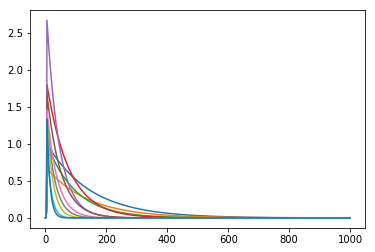

In [5]:
attack = 5
partials = 11

inst = RissetBell(rissetBell.iloc[0:partials], attack/1000)
x = song.Compile(inst)
display(Audio(x, rate=song.fs))
    
for x in inst.EnvelopeView():
    plt.plot(x)

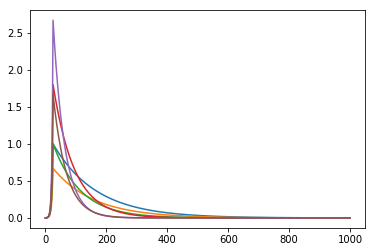

In [6]:
attack = 25
partials = 6

inst = RissetBell(rissetBell.iloc[0:partials], attack/1000)
x = song.Compile(inst)
display(Audio(x, rate=song.fs))
    
for x in inst.EnvelopeView():
    plt.plot(x)